<a href="https://colab.research.google.com/github/AftabUdaipurwala/MachineLearningBasics/blob/main/IMS_Demo_1_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Section

In [ ]:
pip install bioinfokit

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
from google.colab import drive
from bioinfokit.visuz import cluster
from bioinfokit.analys import get_data

# Load Data

In [3]:
from sklearn.datasets import load_iris
data = load_iris(as_frame=True)
data_iris = data.data
data_iris['Target']=pd.DataFrame(data.target)
data_iris['Target'] = data_iris['Target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})
data_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Check Data Metrics

In [4]:
data_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Train Test split

In [5]:
X=data_iris[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']]
y=pd.DataFrame(data.target)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(100, 4) (50, 4) (100, 1) (50, 1)


# Check Correlations in data

In [6]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

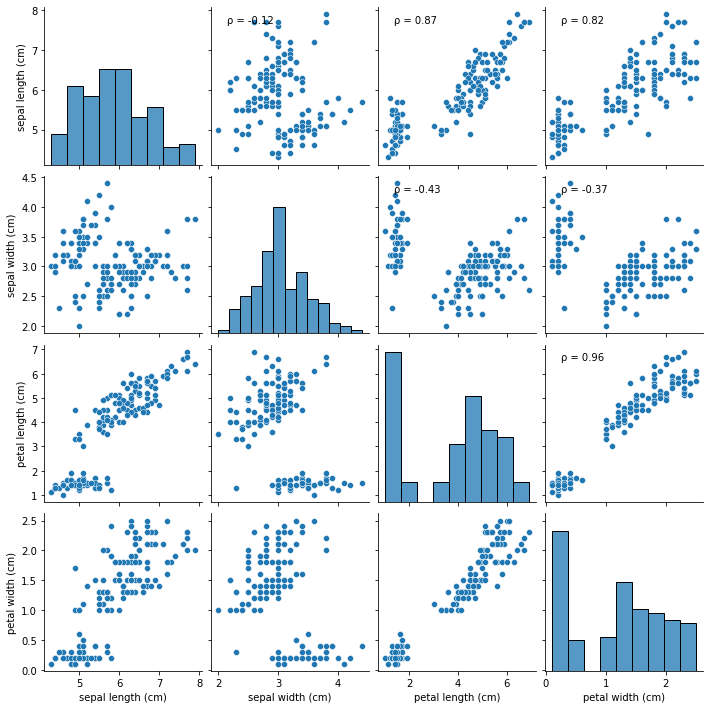

In [7]:
g =sns.pairplot(data_iris)
g.map_upper(corrfunc)
plt.show()

HIGH CORRELATIONS AMONG INDEPENDENT VARIABLES LEAD OT "MULTI COLLINEARITY PROBLEM"


# Scaling with mean and Standard deviation value (Z score)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principle Componenet Analysis

In [9]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
 
pca = PCA()
 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [10]:
# Your Eigen values
pca.explained_variance_

array([2.98291099, 0.8879124 , 0.14759339, 0.02198726])

In [11]:
# Your Eigen Vectors, normalized linear combinations of the variables
pca.components_

array([[ 0.514909  , -0.29586059,  0.57644347,  0.56129151],
       [ 0.401727  ,  0.91220987,  0.0430677 ,  0.0680716 ],
       [-0.71008541,  0.25820608,  0.14472659,  0.638876  ],
       [-0.26317835,  0.11691572,  0.80306433, -0.52168531]])

Output of R Programming

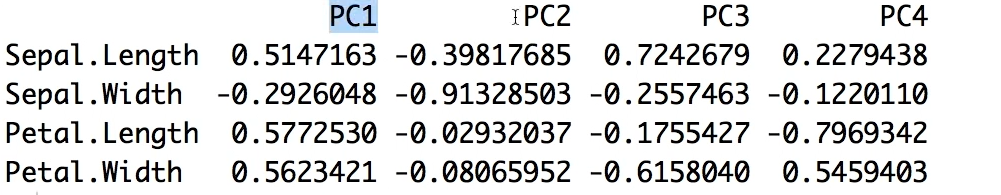

# Variablity Explaination

Text(0, 0.5, 'cumulative explained variance')

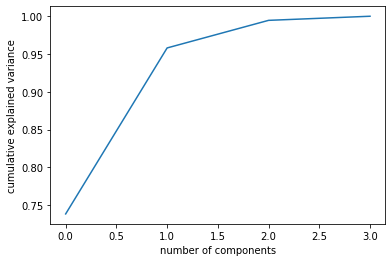

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [13]:
explained_variance = pca.explained_variance_ratio_
print(explained_variance*100)

[73.82704701 21.97583184  3.65293638  0.54418477]


# Orthogonality of PC's

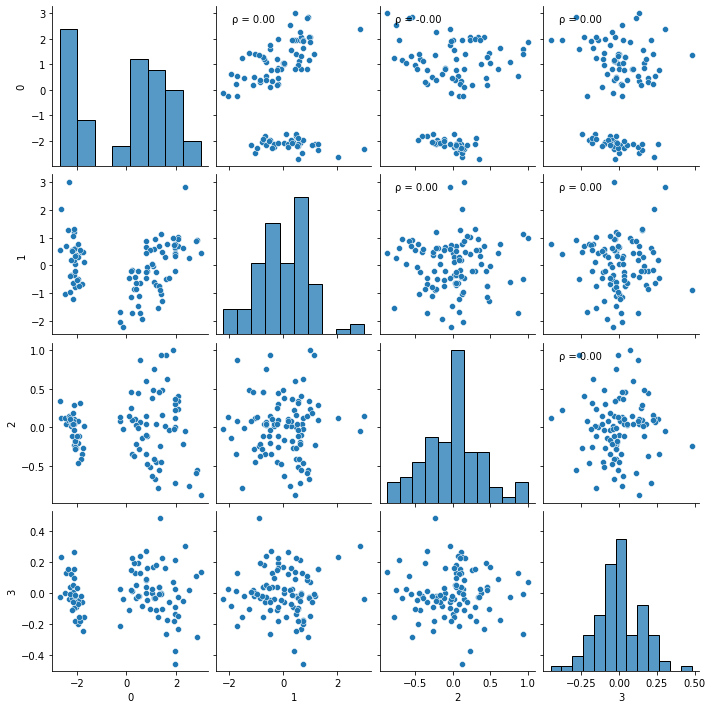

In [14]:
components = pca.fit_transform(X_train)
g = sns.pairplot(pd.DataFrame(components))
g.map_upper(corrfunc)
plt.show()

Multi Collinearity Problem solved

# Scree Plot

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


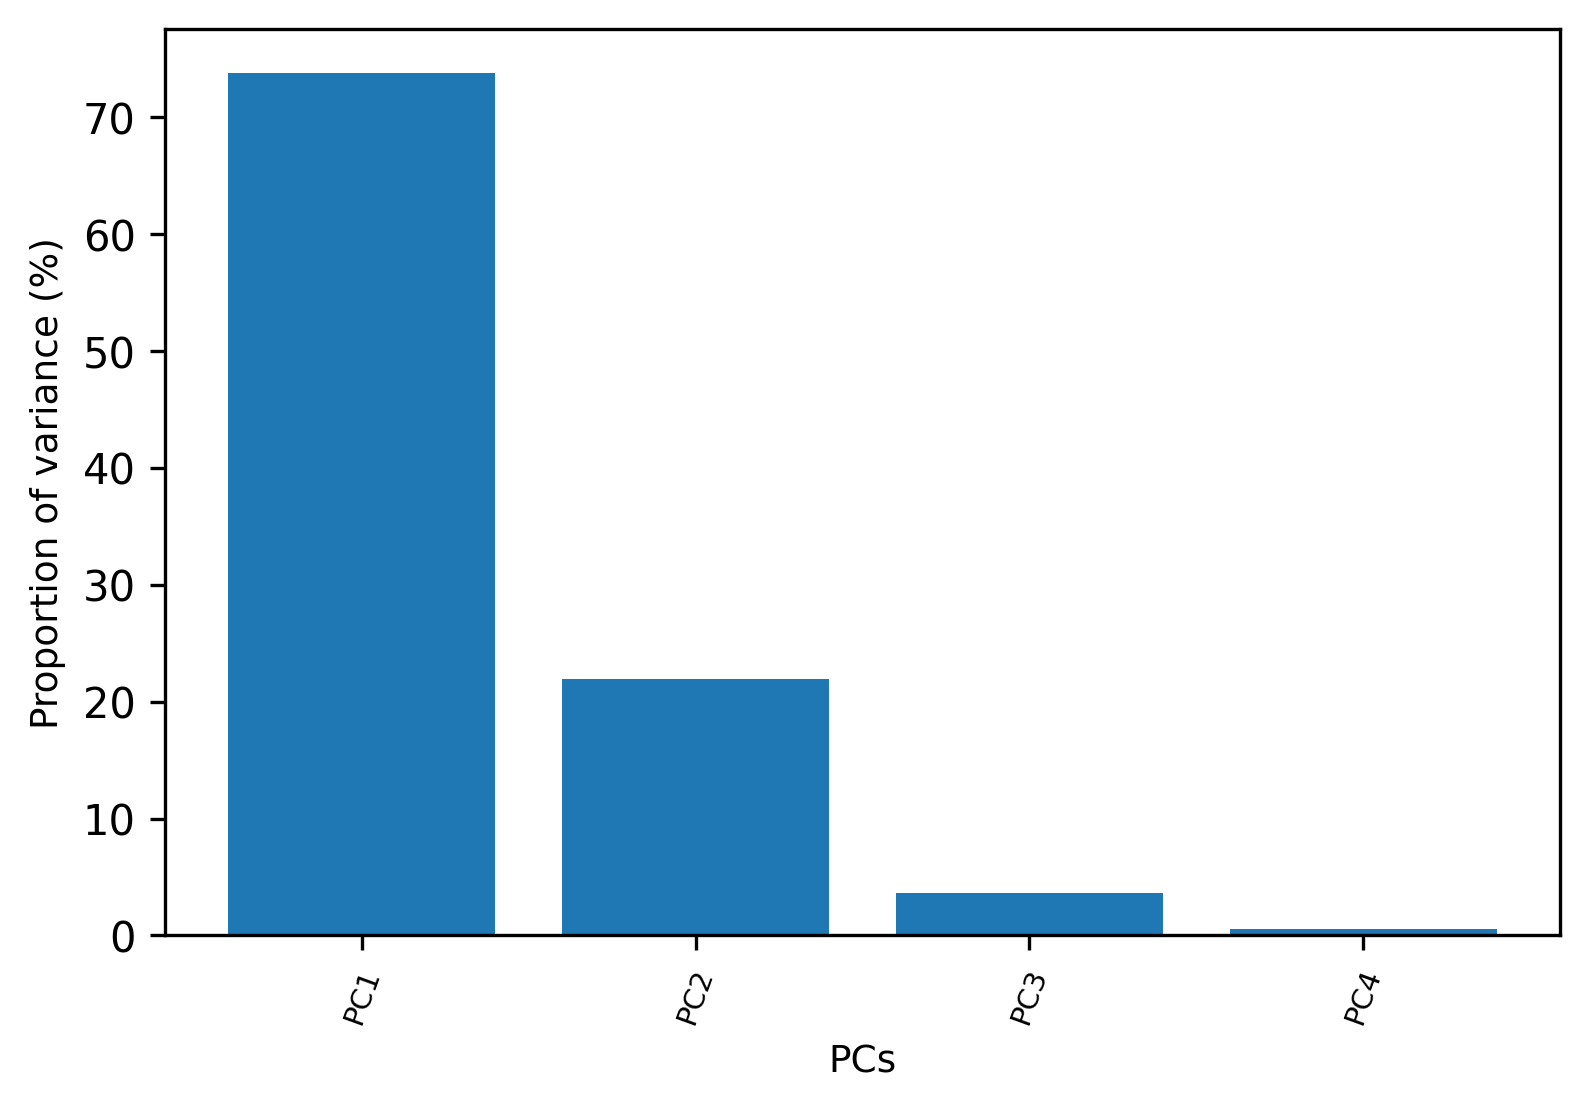

In [15]:
loadings = pca.components_
cluster.screeplot(obj=[['PC1','PC2','PC3','PC4'], pca.explained_variance_ratio_])

img = cv2.imread("screeplot.png")
cv2_imshow(img)

# Bi Plot

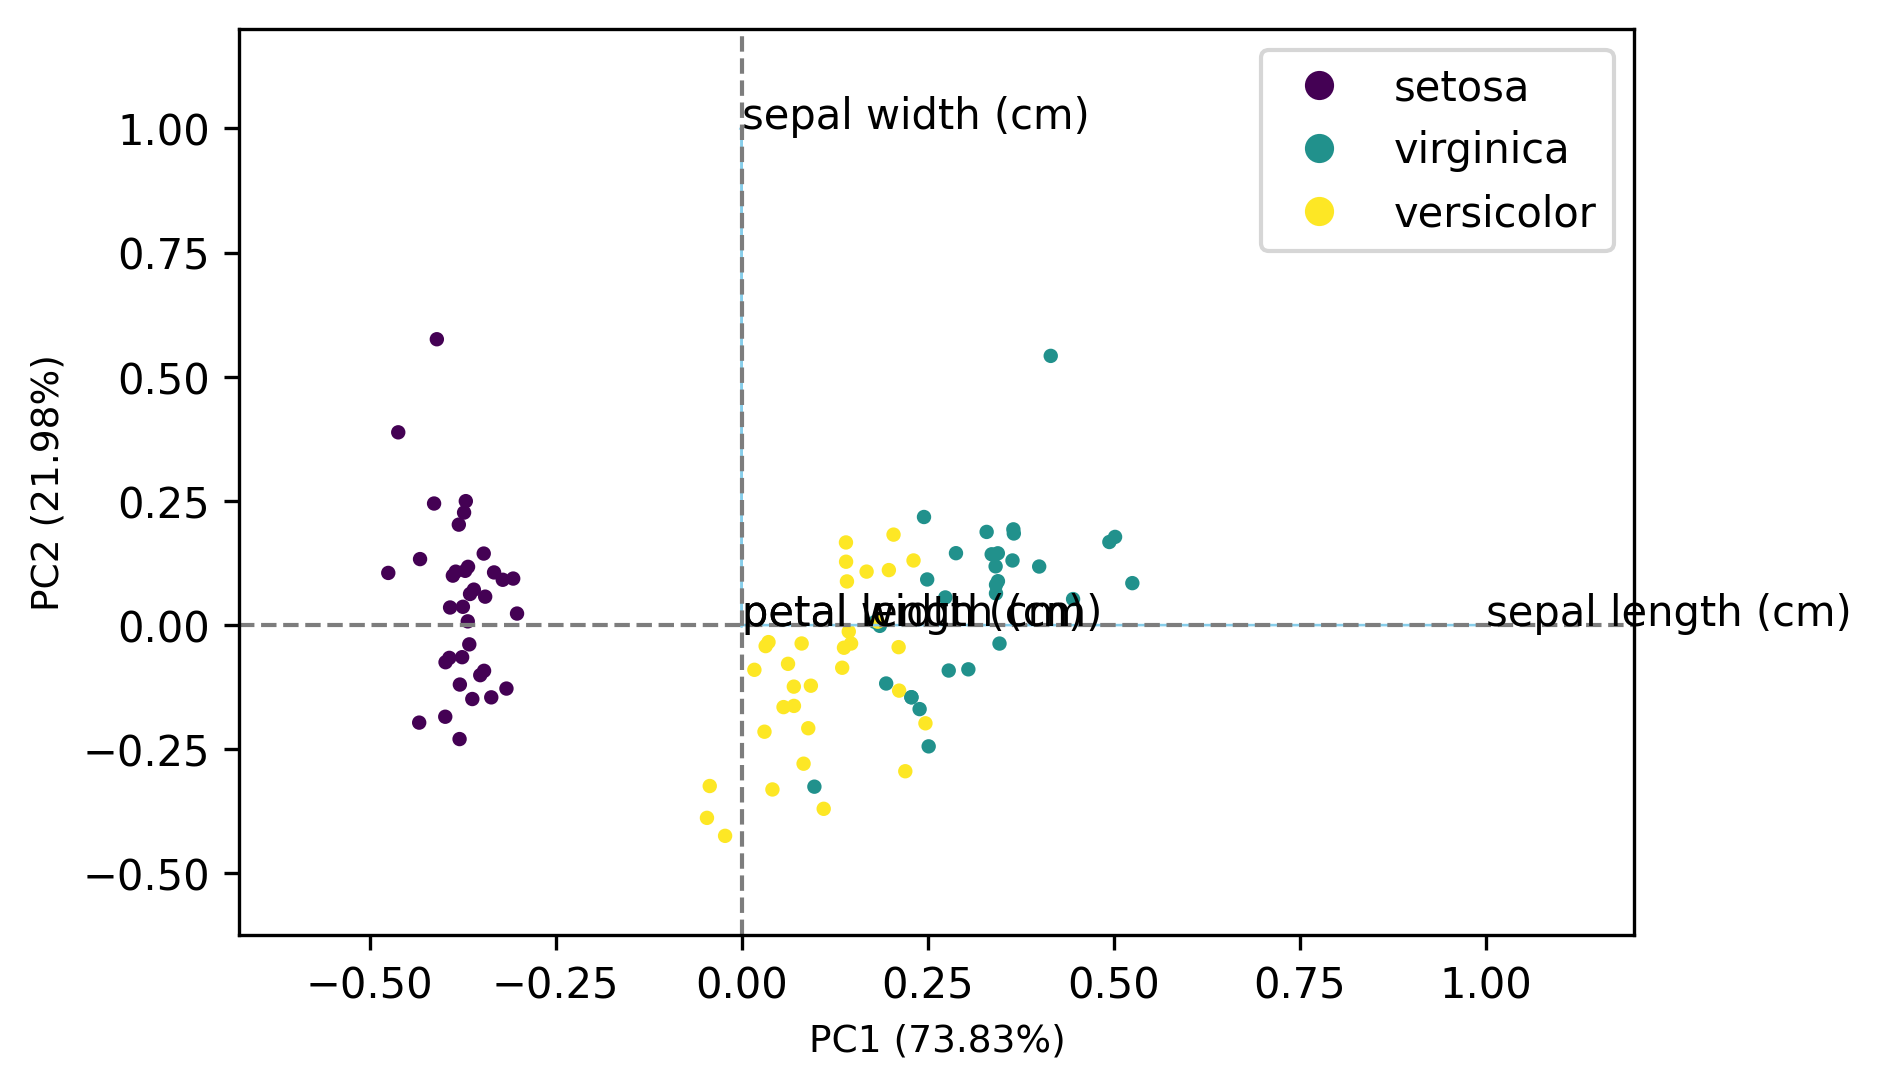

In [95]:
# get biplot
target=pd.Series(y_train['target'].replace({0: 'setosa', 1: 'versicolor', 2: 'virginica'}).values)
pca_scores = X_train
loadings = pca.components_
pca.explained_variance_

cluster.biplot(cscore=pca_scores, 
               loadings=loadings, 
               labels=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)'], 
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
               var2=round(pca.explained_variance_ratio_[1]*100, 2),
               colorlist=target)
img = cv2.imread("biplot_2d.png")
cv2_imshow(img)